# Tabla de contenidos



* [1. Introducción](#1)

* [2. Understanding](#2)
  * [2.1 ¿En qué consiste el proyecto?](#2.1)
  * [2.2 Plan preliminar del proyecto](#2.2)
  
 

* [3. Data understanding](#3)
  * [3.1 Diccionario de datos ](#3.1)
  * [3.2 Distribución de la variable Visitor](#3.2)
  * [3.3 Diferencias entre tiempo de sesión entre visitantes y no visitantes](#3.3)
  * [3.4 Heatmaps de correlacion](#3.4)


* [ 4. Data Preparation](#4)
  * [4.1 Graficas de series de tiempo](#4.1)
* [ 5. Modeling](#5)
  * [5.1 Graficas de series de tiempo](#5.1)
  * [5.2 AutoML y Auto-Sklearn](#5.2)
  * [5.3 pipeline profile](#5.3)

* [ 6. Evaluation](#6)






  


  

In [ ]:
#cargamo las librerias
 # numpy and pandas for data manipulation
import numpy as np
import pandas as pd


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#matplotlib utils
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# auto-sklearn dependencies
# Simply adding &> /dev/null to the tail of any command will silence its output outside of any errors that may arise.
!apt-get install swig -y &> /dev/null
!pip install Cython numpy &> /dev/null
!pip install auto-sklearn &> /dev/null
import sklearn
!pip install scipy==1.7.0 &> /dev/null

#import autosklearn.classification as classifier
from sklearn.model_selection import train_test_split
#evaluation dependencies
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import pickle
!pip install pipelineprofiler &> /dev/null
import PipelineProfiler

<a id="1"></a>

# 1. Introducción
<p>El proceso estándar entre industrias para la minería de datos, conocido como <b> CRISP-DM </b> (Cross-industry standard process for data mining), es un modelo de proceso estándar abierto que describe enfoques comunes utilizados por expertos en minería de datos o ciencia de datos. Es el modelo de análisis más utilizado en la industria.</p>

 <p> En escencia, <b> CRISP DM </b> es un set de buenas practicas para ayudar a planear, organizar y ejecutar projectos de data mining or data analytics  </p>
 
 <p>El análisis presentado a continuación se realizó siguiendo las líneas de <b> CRISP DM</b> </p>


<center> <p><img class = "center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/319px-CRISP-DM_Process_Diagram.png" width="400" height="400 alt="CRISP-DM"></p> </center>

<a id="2"></a>

# 2. Business Understanding

Antes de ejercutar algun analisis, o tirar alguna linea de codigo lo primero es entender el problema en si. 

En la primera fase ( Business Understanding) se identifica los siguientes puntos:

- Identificar los requerimentos
- Evaluar la situación
- Producir un plan preeliminar de proyecto





<a id="2.1"></a>

## 2.1 ¿En qué consiste el proyecto? 

*   Utilizando la base llamada "e" realizar un análisis descriptivo y exploratorio de la base de datos, encuentra y grafica cómo se distribuyen los visitantes, horas, días, etc... El análisis es libre, ¡sorpréndenos!

*   Algo muy importante del dataset "e" es encontrar qué es lo que hace a un visitante y con ese hallazgo analizar el dataset "v"

* El dataset "v" es idéntico al "e" SOLO EN COLUMNAS, los datos en las filas son
diferentes y fungen como datos completamente nuevos para el modelo. En
consecuencia, “v” no tiene etiquetado si el usuario es visitante o no. 


<a id="2.2"></a>

## 2.2 Plan preliminar del proyecto

La descripcion del proyecto nos indica que estamos contra un problema de clasificacion , en especifico un problema de clasificacion de la columna o variable **visitantes**, el plan preeliminar será hacer un EDA (Exploratory Data Analysis) simple, teniendo en cuenta que la columna a predecir es **visitantes**. 

<hr>

<a id="3"></a>

# 3. Data Understanding

Una vez identificada los requerimentos y elavorado el plan preliminar procedemos a la description y exploracion de los datos, usalmente dentro del **CRSIP-DM** se abordan las siguientes directivas (muy similares a las que se tomaron en cuenta) :

- Reunir datos
- Descripción de los datos
- Exploración de los datos
- Verificar la calidad de los datos


<a id="3.1"></a>

## 3.1 Diccionario de datos

Dos sets de datos **"e"** y **"v"** fueron captados con algunos sensores de tecnología de tracking de la posición de celulares mediante señales de wifi. Los análisis que te pedimos nos ayudes a
realizar son los siguientes:



*   **Ambas bases cuentan con las siguientes variables:**


  * device_mac
  * branch_office
  * month_tz
  * day_tz
  * day_of_week_tz
  * hour_tz
  * visitor
  * tiempodeses



*   *device_mac*: se refiere al identificador único de un celular, cada célula asumimos es una persona 

*   *branch_office*: es la sucursal de cliente

* *visitor*: es una variable indicadora donde **true** significa que es visitante del lugar y **false** que no

* *tiempodeses*: es el tiempo de la sesión (en segundos)



In [ ]:
#load datasets from repository
!rm -rf devf_interview
!git clone https://github.com/EiderDiaz/devf_interview


Cloning into 'devf_interview'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 22 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [ ]:
#read dataset into pandas dataframe
e_df = pd.read_csv("devf_interview/klustera/e.csv")
v_df = pd.read_csv("devf_interview/klustera/v.csv")
#see the fisrt 10 rows of each dataset
print(e_df.head())
print("_____________________________________________________")

print(v_df.head())
#drop the unnamed (index column)
e_df.drop(columns=e_df.columns[0], 
        axis=1, 
        inplace=True)
v_df.drop(columns=v_df.columns[0], 
        axis=1, 
        inplace=True)

   Unnamed: 0         device_mac  branch_office  ...  hour_tz  visitor tiempodeses
0           1  00:00:00:6a:17:ce              1  ...        0     True        2676
1           2  00:00:00:6a:17:ce              1  ...        1     True        2676
2           3  00:00:00:6a:78:ae              1  ...       20    False           0
3           4  00:00:02:fa:9c:12              1  ...       12     True        2272
4           5  00:00:08:7d:e2:58              3  ...       19    False           0

[5 rows x 9 columns]
_____________________________________________________
   Unnamed: 0         device_mac  ...  hour_tz  tiempodeses
0           1  a8:81:95:56:31:3c  ...        4            0
1           2  44:6e:e5:1b:68:81  ...       22          477
2           3  0c:b3:19:10:78:17  ...       10            0
3           4  44:74:6c:0a:20:23  ...       21            0
4           5  ac:5f:3e:c8:dc:35  ...       16            0

[5 rows x 8 columns]


In [ ]:
#exploremos mas a fondo cada dataframe:
print("e_df:")
print(e_df.info())
print("_________________________________________________")
print("v_df:")
print(v_df.info())

e_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249556 entries, 0 to 249555
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   device_mac      249556 non-null  object
 1   branch_office   249556 non-null  int64 
 2   month_tz        249556 non-null  int64 
 3   day_tz          249556 non-null  int64 
 4   day_of_week_tz  249556 non-null  object
 5   hour_tz         249556 non-null  int64 
 6   visitor         249556 non-null  bool  
 7   tiempodeses     249556 non-null  int64 
dtypes: bool(1), int64(5), object(2)
memory usage: 13.6+ MB
None
_________________________________________________
v_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   device_mac      90000 non-null  object
 1   branch_office   90000 non-null  int64 
 2   month_tz        90000 no

- la info mas detallada nos dice que e_df es un dataset de aprox 250K observaciones y 8 variables (249K x 9)
- y que v_df (90K x 7)   
- el detalle nos indica que no hay datos faltantes en ninguno de los dos dataset :)
<a id="3.2"></a>

## 3.2 Distribución de la variable Visitor

 con esta informacion procedemos a verificar la calidad de los dataframes y describir mas a fondo la distribucion de la feature **visitor**

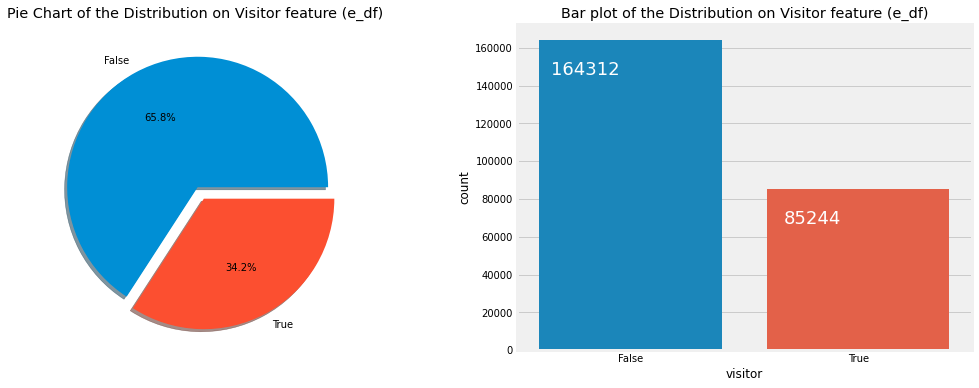

In [ ]:
#pie plot de visitor
f,ax=plt.subplots(1,2,figsize=(16,6))
e_df['visitor'].value_counts().plot.pie(explode=[0,0.1],  autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Pie Chart of the Distribution on Visitor feature (e_df) ')
ax[0].set_ylabel('')

# histogram de visitor
sns.countplot('visitor', data=e_df,ax=ax[1])
ax[1].set_title('Bar plot of the Distribution on Visitor feature (e_df)')
#trick for display the count pretty
for p in ax[1].patches:
    ax[1].annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()


una vez investigado sobre la distribucion de la variable principal, dare un vistazo a otra variable importante, la cual es device_mac

In [ ]:
macs_dups_df = e_df.pivot_table(columns=['device_mac','visitor'], aggfunc='size')
# promedio en el que se repite un device_mac
print ("promedio en el que se repite device_mac:",np.mean(macs_dups_df))
print("__________________________________________________")
print (macs_dups_df.sort_values(ascending=False))


promedio en el que se repite device_mac: 1.8292005365428172
__________________________________________________
device_mac         visitor
00:20:00:94:8e:d3  True       489
64:66:b3:ba:6d:fc  True       454
lon                True       444
68:b5:99:8d:05:07  True       444
00:23:68:b2:58:a7  True       415
                             ... 
88:79:7e:ad:04:b8  False        1
88:79:7e:ad:28:13  False        1
88:79:7e:ad:28:dc  False        1
88:79:7e:ad:a3:57  False        1
84:38:38:3b:82:c3  False        1
Length: 136429, dtype: int64


por los anteriores calculos podemos observar que:

- en promedio se repiten 1.8 veces cada device_mac
- la device_mac que mas es de un visitante y se repite 489 veces
- preliminarmente se repiten mas los visitantes que los no visitantes  

<a id="3.3"> </a>

## 3.3 Diferencias entre tiempo de sesión entre visitantes y no visitantes

describire mas a fondo las diferencias entre los tiempos de sesion agrupados por visitante y no visitante


visitor
False       4.38517
True     6943.75129
Name: tiempodeses, dtype: float64


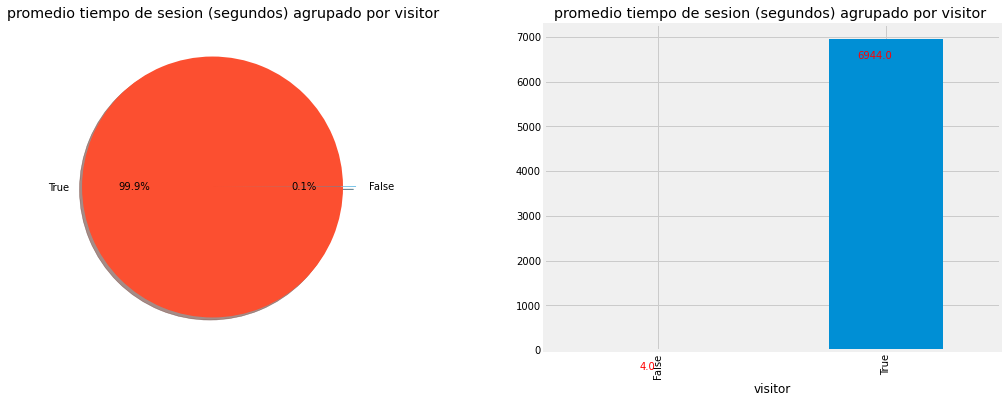

In [ ]:
#cuanto tiempo en promedio dura un visitante y un no visitante 
print(e_df.groupby("visitor")["tiempodeses"].mean())
f,ax=plt.subplots(1,2,figsize=(16,6))
e_df.groupby("visitor")["tiempodeses"].mean().plot.pie(explode=[0,0.1],  autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('promedio tiempo de sesion (segundos) agrupado por visitor ')
ax[0].set_ylabel('')

# histogram de visitor
e_df.groupby("visitor")["tiempodeses"].mean().plot.bar()
ax[1].set_title('promedio tiempo de sesion (segundos) agrupado por visitor ')
#trick for display the count pretty
for p in ax[1].patches:
    ax[1].annotate(f'\n{np.round(p.get_height())}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='red', size=10)
plt.show()



hay un inmenso desvalance en los tiempos de sesion entre los vistantes y no:

- teniendo en promedio 4 segundos los no visitantes
- 6944 segundos los visitantes 

<a id="3.4"> </a>

## 3.4 Heatmaps de correlacion

una vez descrito la variable principal veamos la relacion general entre todas las variables con un correlation heatmap

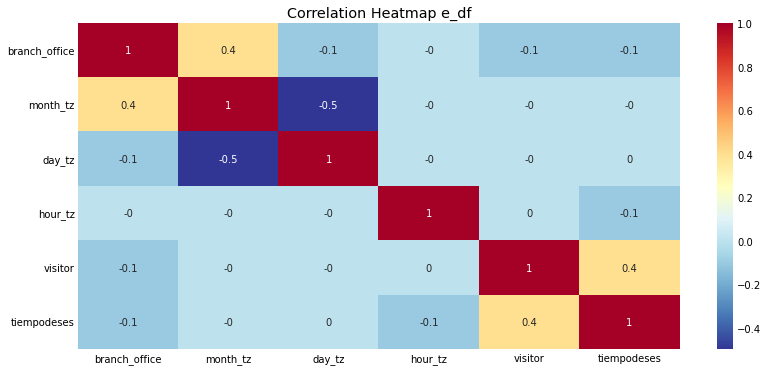

In [ ]:
e_df_corrs = round(e_df.corr(),1)
plt.figure(figsize = (12, 6))
# Heatmap of correlations
sns.heatmap(e_df_corrs, cmap = plt.cm.RdYlBu_r, annot=True)
plt.title('Correlation Heatmap e_df');

a este punto surge algo interesante, y es que el tiempo de sesion tiene una correlacion (mas o menos) , significativa con visitor, y es un buen punto de partida

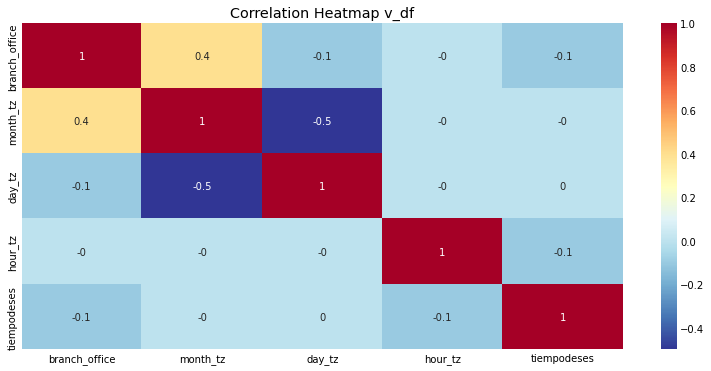

In [ ]:
v_df_corrs = round(v_df.corr(),1)
plt.figure(figsize = (12, 6))
# Heatmap of correlations
sns.heatmap(v_df_corrs, cmap = plt.cm.RdYlBu_r, annot=True)
plt.title('Correlation Heatmap v_df');

solo para verificar que tienen las mismas corelaciones, hacemos lo mismo en el v_df


In [ ]:
print("porcentaje de datos device_mac sin repetir (e_df):", np.round(len(np.unique(e_df["device_mac"])) / e_df.shape[0],3 ))

print("porcentaje de datos device_mac sin repetir (v_df):", np.round(len(np.unique(v_df["device_mac"])) / v_df.shape[0],3))


porcentaje de datos device_mac sin repetir (e_df): 0.502
porcentaje de datos device_mac sin repetir (v_df): 0.622


50 % de los datos son repetidos , consistente con los hallazgos previos, donde se encontro que un device_mac se repite en promedio 1.8 veces
<hr>

###  En conclusion ...

observamos que es un dataset desbalanceado ya que  <font color='blue'> no visitantes </font> tiene mas incidencias que  <font color='orange'>  visitantes </font> constituyendo en 66% de las observaciones. 

ademas, observamos que cada persona (device_mac) , se repite en promedio 1.8 veces y que  <font color='blue'> no visitantes </font> tiene en promedio 4 segungos de session contra <font color='orange'>  visitantes </font> que tiene casi 2 horas en tiempo de sesion

cabe recalcar que estas diferencias se ven dentro de los heatmaps ya que se aprecia que puede utilizarse esa variable para describir el comportamiento de visitor mas que cualquier otra.

en esta fase, podemos concluir algo importante sobre la historia que nos cuentan los datos: 

aunque <font color='blue'> no visitantes </font> son individuos que representan la mayor incidencia de observaciones en el dataset, su tiempo de sesion promedio es corto (4 segundos) comparado contra <font color='orange'>  visitantes </font> que es de casi dos horas.





<a id="4"></a>

# 4. Data Preparation

Ya que describimos y exploramos los datos, lo siguiente es la preparacion de los dataset para su facil manipulacion, y el formateo de algunas columnas, en este caso se construira una variable nueva (**date**) a partir las variables de de **month_tz** y **day_tz**.

- de igual manera, como se cuenta **day_of_week_tz** , **month_tz** y **day_tz** puedo deducir el año y manejar los datos mas facil, con funciones que apropiapas para el tipo de dato datetime

Las directivas que abordan en esta fase segun el **CRSIP-DM** :


- Seleccionar datos
- Limpieza de datos
- Construcción de datos
- Integración de datos
- Formatear datos


- tambien a este punto, me di cuenta de que es momento de convertir las variables de de **month_tz** y **day_tz** a datetime y comenzar a limpiar y formatear los datasets

- como tengo **day_of_week_tz** , **month_tz** y **day_tz** puedo deducir el año y manejar los datos mas facil, con sus propias funciones de datetime

In [ ]:
#function to get the year based on the  **month_tz** , **day_tz**  and **day_of_week_tz**
def get_year_from_df(df):
    year_not_found = True 
    year = 2021
    while year_not_found:
        #cast dataframe tz values to datetime 
        curr_date_df = pd.to_datetime(e_df.apply(lambda x: datetime.datetime(year, x['month_tz'], x['day_tz']), axis=1))
        # si todos los day_of_week_tz son iguales a los nombres de los dias del curr_date_df
        if sum( df["day_of_week_tz"].eq( curr_date_df.dt.day_name())) == df.shape[0]:
            return year
        else:
            print("not equal on year:",year)
            year = year -1 

print("year found: ",get_year_from_df(e_df))

not equal on year: 2021
not equal on year: 2020
not equal on year: 2019
not equal on year: 2018
not equal on year: 2017
year found:  2016


ahora que ya sabemos el año en el que fueron capturados los datos fue **2016**, procedemos a convertirlos a formato date 

In [ ]:
#crear la variable date con el año correcto y las demas variables tz
e_df["datetime"] = pd.to_datetime(e_df.apply(lambda x: datetime.datetime(2016, x['month_tz'], x['day_tz'],x["hour_tz"]), axis=1))

e_df


,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses,datetime
0,00:00:00:6a:17:ce,1,11,2,Wednesday,0,True,2676,2016-11-02 00:00:00
1,00:00:00:6a:17:ce,1,11,2,Wednesday,1,True,2676,2016-11-02 01:00:00
2,00:00:00:6a:78:ae,1,10,30,Sunday,20,False,0,2016-10-30 20:00:00
3,00:00:02:fa:9c:12,1,11,13,Sunday,12,True,2272,2016-11-13 12:00:00
4,00:00:08:7d:e2:58,3,11,4,Friday,19,False,0,2016-11-04 19:00:00
...,...,...,...,...,...,...,...,...,...
249551,lon,1,11,30,Wednesday,11,True,50152,2016-11-30 11:00:00
249552,lon,1,11,30,Wednesday,12,True,50152,2016-11-30 12:00:00
249553,lon,1,11,30,Wednesday,14,True,50152,2016-11-30 14:00:00
249554,lon,1,11,30,Wednesday,15,True,50152,2016-11-30 15:00:00


<a id="4.1"></a>

## 4.1 Graficas de series de tiempo

una vez creada la nueva feature datetime es facil agrupar por dia o hora y crear algunas graficas que nos muestran el comportamiento atravez del tiempo


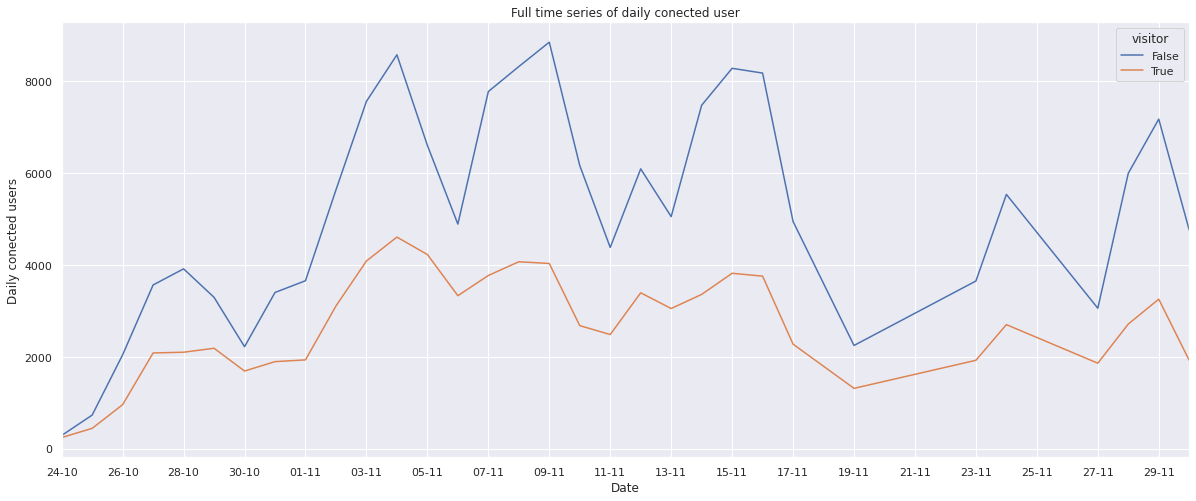

In [ ]:
sns.set(rc={'figure.figsize':(18,8)})
#count the number of visitors daily gropued by visitor or not
e_df_daily = e_df.groupby([e_df['datetime'].dt.to_period('D'), 'visitor']).count().unstack()

e_df_daily.columns = e_df_daily.columns.droplevel(0)

e_df_daily= e_df_daily.iloc[:,0:2] #eliminate the repeated columns
ax = e_df_daily.plot()

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Daily conected users",
       title="Full time series of daily conected user")
 # eliminate minor ticks
ax.tick_params(axis='x',  bottom=False,  which='minor',labelbottom=False)     
#set 20 tikcs
ax.xaxis.set_major_locator(MaxNLocator(20)) 

# Define the date format
date_form = mdates.DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)

en la figura anterior podemos observar el comportamiento de los usuarios conectados, agrupados por dia y separados por si son visitantes (en naranja) o no (en azul)
 
podemos observar que los valles y crestas se conservan entre las dos , aunque los no visiantes (en azul) son mas pronunciadas, lo que podria traducirse en que si tenemos un aumento de visitantes deberiamos esperar un aumento de no visitantes.

solo para investigar si el comportamiento es igual en todas las oficinas hare lo mismo pero separado por la oficina 1 y 2

(126939, 9)
(249556, 9)
(24542, 9)
(249556, 9)
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f555eeb85f0> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 864x288 with 2 Axes>

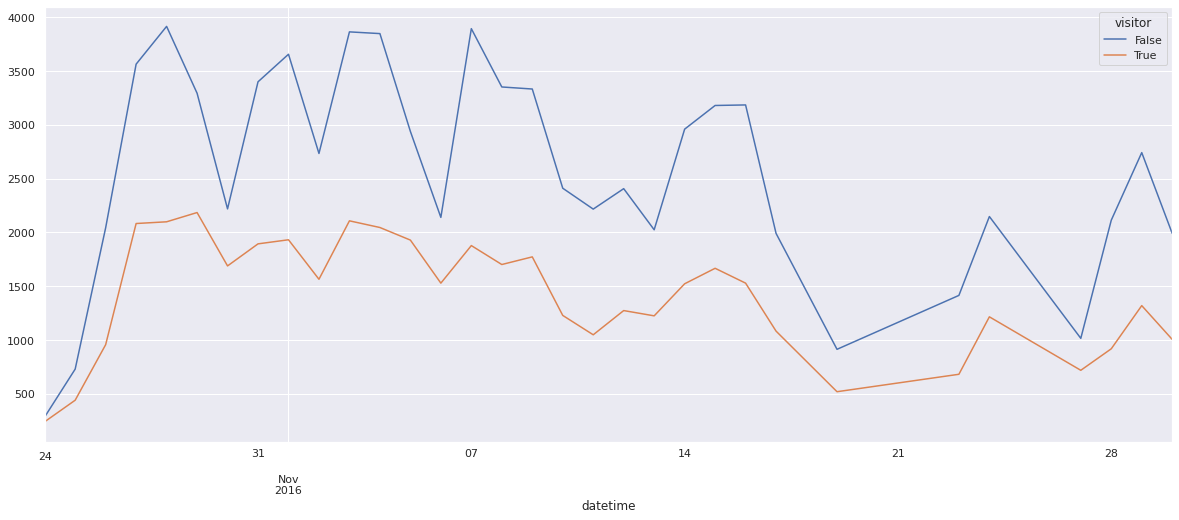

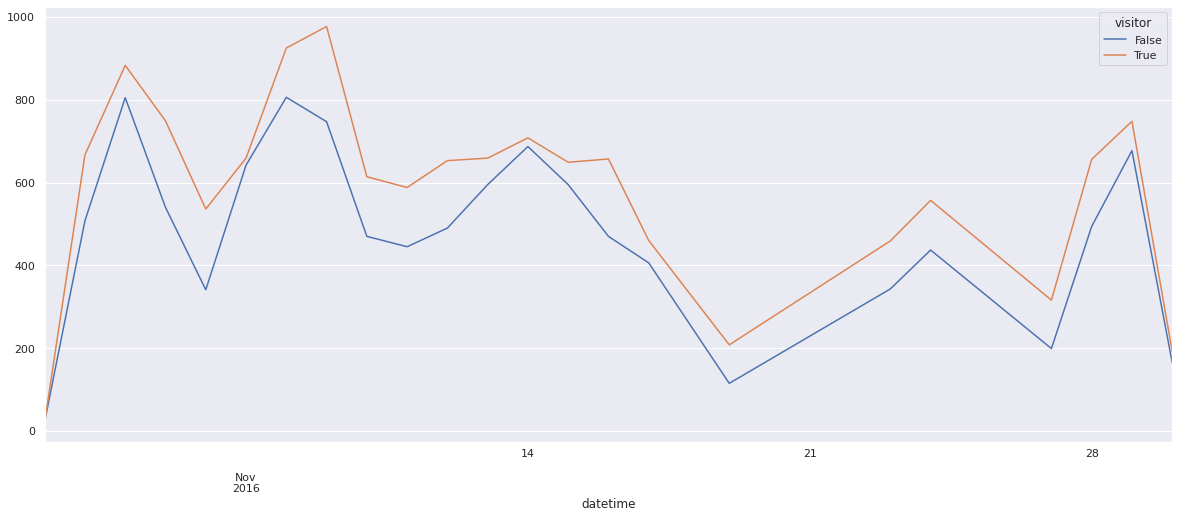

In [ ]:
f,ax=plt.subplots(2,1,figsize=(12,4))
#count the number of visitors daily gropued by visitor or not
e_df_office1 = e_df[e_df.branch_office==1]
print(e_df_office1.shape)
print(e_df.shape)

e_df_daily = e_df_office1.groupby([e_df_office1['datetime'].dt.to_period('D'), 'visitor']).count().unstack()
e_df_daily.columns = e_df_daily.columns.droplevel(0)

e_df_daily= e_df_daily.iloc[:,0:2] #eliminate the repeated columns
e_df_daily.plot()

ax[0].set(xlabel="Date",
       ylabel="Daily conected users",
       title="Full time series of daily conected user")
ax[0].tick_params(axis='x',  bottom=False,  which='minor',labelbottom=False) 
ax[0].xaxis.set_major_locator(MaxNLocator(20)) 

date_form = mdates.DateFormatter("%d-%m")
ax[0].xaxis.set_major_formatter(date_form)

##########################################
e_df_office1 = e_df[e_df.branch_office==2]
print(e_df_office1.shape)
print(e_df.shape)

e_df_daily = e_df_office1.groupby([e_df_office1['datetime'].dt.to_period('D'), 'visitor']).count().unstack()
e_df_daily.columns = e_df_daily.columns.droplevel(0)

e_df_daily= e_df_daily.iloc[:,0:2] #eliminate the repeated columns
e_df_daily.plot()

ax[1].set(xlabel="Date",
       ylabel="Daily conected users",
       title="Full time series of daily conected user")
ax[1].tick_params(axis='x',  bottom=False,  which='minor',labelbottom=False) 
ax[1].xaxis.set_major_locator(MaxNLocator(20)) 

date_form = mdates.DateFormatter("%d-%m")
ax[1].xaxis.set_major_formatter(date_form)


este comporamiento es anomalo en la oficina 2 podemos observar que es mayor el numero de visitantes que no visitantes, contrastado con todo los demas, donde siempre son mayores las conexiones en no visitantes (la linea azul siempre esta por arriba de la naranja)

In [ ]:
sns.set(rc={'figure.figsize':(18,8)})
#count the number of visitors Hourly gropued by visitor or not
e_df_hourly = e_df_office.groupby([e_df_office['datetime'].dt.to_period('H'), 'visitor']).count().unstack()
e_df_hourly.columns = e_df_hourly.columns.droplevel(0)
e_df_hourly= e_df_hourly.iloc[:,0:2]
#convert index to interval to datetime again
e_df_hourly.index  = e_df_hourly.index.to_timestamp()
ax= e_df_hourly.plot()


# Set title and labels for axes
ax.set(xlabel="Datetime",
       ylabel="Hourly conected users",
       title="Full time series of Hourly conected users")
 # eliminate minor ticks
ax.tick_params(axis='x',  bottom=False,  which='minor',labelbottom=False)     
#set 20 tikcs
ax.xaxis.set_major_locator(MaxNLocator(20)) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Define the date format
date_form = mdates.DateFormatter('%d-%m %H:%M')
ax.xaxis.set_major_formatter(date_form)
# rotate and align the tick labels so they look better

NameError: ignored

solo para investigar mas progundo hacemos la misma exploracion pero con una deriodicidad de una hora.

podemos observar los mismos patrones:

 - visitantes se mantiene por debajo de no visitantes
 - crestas y valles pasan al mismo tiempo (positivamente correlacionados)
 

A este punto podemos observar 3 cosas que nos estan contando los datos sobre los <font color='orange'>  visitantes </font> es que :

- el porcentaje de <font color='orange'>  visitantes </font> es de 35% 

- el tiempo promedio de sesion es de 6944, (aproximadamente 2 horas)

- y consistente con el porcentaje de <font color='orange'>  visitantes </font>, la cantidad de observaciones conectadas en las graficas de series de tiempo, se conserva por debajo del numero de <font color='blue'> no visitantes </font> (excepto en la office 2)

por otra parte los <font color='blue'> no visitantes </font>



- su porcentaje del total de observaciones es de <font color='orange'>  visitantes </font> es de 65% 

- el tiempo promedio de sesion es de 4 segundos

- y consistente con el porcentaje de <font color='blue'> no visitantes </font> siempre se encuentra por encima de <font color='orange'>  visitantes </font> en las series de tiempo 
<hr>

<a id="5"></a>

# 5. Modeling
 La parte favorita de los Data Enthusiast. Ya que tenemos los datos en una manera conveniente ahora se puede buscar patrones útiles en los datos y describir este problema de una manera mas profunda.

En esta fase vamos a usar una libreria de Auto-ML llamada auto-sklearn para ayudarnos a entrenar y seleccionar el mejor modelo (en realidad toda la parte de modeling)

Las directivas que abordan en esta fase segun el **CRSIP-DM** :


- Seleccionar modelos
- Diseñar tests
- Entrenar modelos
- Valorar el modelo



<a id="5.1"></a>


## 5.1 construccion de sets train y test 

para meter mis datos dentro del pipeline de auto-sklearn debo ponerlos dentro de las especificaciones comunes, quitar algunas columnas , formatear otras y dividirlos en los sets de entrenamiento y testeo. 

In [ ]:
#formatear las features en X, y para ponerlas en el pipeline de auto-sklearn
X = e_df.loc[:,["device_mac","branch_office","month_tz","day_tz","day_of_week_tz", "hour_tz","tiempodeses"]]
# cambiar a categorico para que pueda ser usado por los modelos
X["day_of_week_tz"] = X['day_of_week_tz'].astype('category')
#subset de la variable a predecir
y= e_df.loc[:,["visitor"]] 
print(X.head())
print("_____________________________________________")
print(y.head())
#make the slipting
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42)

<a id="5.2"></a>
## 5.2 AutoML y Auto-Sklearn

como dije anteriormente usare auto-sklearn el cual es un flujo de trabajo automatizado que pueda realizar automáticamente el preprocesamiento, la selección del modelo, el ajuste de hiperparámetros y todas las demás etapas del proceso de Machine learning.

Esta imagen tomada del servicio de AutoML de Azure ilustra el panorama planteado.


<center> <p><img class = "center" src="https://i0.wp.com/neptune.ai/wp-content/uploads/Microsoft-Azure-AutoML.png" width="700" height="350" alt="autoML"></p> </center>

### 5.2.1 Auto-Sklearn
auto-sklearn se basa en definir AutoML como un problema CASH.

CASH = (Combined Algorithm Selection and Hyperparameter optimization) o Selección de algoritmos combinados y optimización de hiperparámetros. 

En pocas palabras, queremos encontrar el mejor modelo de ML y su hiperparámetro para un conjunto de datos en un vasto espacio de búsqueda, que incluye muchos clasificadores y muchos hiperparámetros. En la siguiente figura, puede ver una representación de auto-sklearn proporcionada por sus autores.


<center> <p><img class = "center" src="https://i1.wp.com/neptune.ai/wp-content/uploads/AutoML-system.png" width="900" height="150" alt="Auto-sklearn"></p> </center>




<hr>

<font color='yellow'>  Recomiendo no correr esta celda almenos que estes a punto de ir a prepararte un cafe o ver tiktok por un rato</font>


el tiempo estimado de ejecucion de esta celda es de 1 hora y el pkl con lo mismo puede ser cargado en la celda sucesiva


In [ ]:
#instanciamos el classifier de autosklearn, por default corre varios modelos  por una hora (3600 segundos)
automlclassifier = classifier.AutoSklearnClassifier(time_left_for_this_task=3600)

#entrenamos el poderosisimo classifier pasandole el X_train y el y train para que haga todas las combinaciones de procesamiento, modelos e hyperparametros
automlclassifier.fit(X_train.iloc[:,1:], #training sin el device_mac
                     y_train)

pickle_out = open("automlclassifier.pkl","wb")

pickle.dump(automlclassifier, pickle_out)
pickle_out.close()


<font color='yellow'> aqui cargamos el pickle :</font>

In [ ]:
#load pickle
infile = open("devf_interview/automlclassifier.pkl","rb")
automlclassifier = pickle.load(infile)
infile.close()

## 5.3 pipeline profiler

un pipeline profiler es es una libreria destinada a producir visualizaciones detalladas de pipelines de autoMl.

<center> <p><img class = "center" src="https://miro.medium.com/max/700/1*xfmgKt_v1lVRlTN0zcqQBA.png
" width="600" height="450" alt="Auto-sklearn"></p> </center>

La figura 1 muestra *PipelineProfiler* aplicado al conjunto de datos *Digits*. El sistema se divide en tres partes.
-  1) La contribución primitiva, que muestra la correlación del uso primitivo con el score del determinado pipeline. 

- 2) Pipeline Matrix, que presenta un resumen de los pipelines, las primitivas utilizadas y los hiperparámetros.

- 3) La vista de comparación de pipelines, que destaca las diferencias entre las pipelines seleccionadas.

In [ ]:
data = PipelineProfiler.import_autosklearn(automlclassifier)
PipelineProfiler.plot_pipeline_matrix(data)

en el caso de plot podemos observar las diferentes combinaciones de diferentes preprocesamientos, clasificadores e hyperparametros que se usaron para obtener el mejor modelo,

<hr>

<a id="6"></a>

# 6. Evaluation

Ya que tenemos nuestro modelo final, procedemos a  fase de comprensión de datos.



Las directivas que abordan en esta fase segun el **CRSIP-DM** :


- Seleccionar modelos
- Diseñar tests
- Entrenar modelos
- Valorar el modelo

la mayoria del trabajo ya esta hecho, por lo pronto procederemos a sacar metricas simples de evaluacion para un modelo de clasificacion

In [ ]:
#obtener las predicciones para 
y_pred = automlclassifier.predict(X_test.iloc[:,1:])


In [ ]:
from sklearn.metrics import plot_confusion_matrix

acc_score = accuracy_score(y_test,y_pred)
auc_score=roc_auc_score(y_test,y_pred)

print(acc_score)
print(auc_score)

tenemos un auc y accuracy de arriba de 95, es una prediccion casi perfecta y un modelo util para utilizarse 

In [ ]:

plot_confusion_matrix(automlclassifier, X_test.iloc[:,1:], y_test)  
plt.show() 

tenemos una confusion matrix casi perfecta, teniendo solo 718 false positives y 1612 false negatives, lo cual indica que el classificador es bueno par la tarea en cuestion

In [ ]:
#obtener las predicciones para v_df

X_v_df = v_df.loc[:,["device_mac","branch_office","month_tz","day_tz","day_of_week_tz", "hour_tz","tiempodeses"]]
X_v_df["day_of_week_tz"] = X_v_df['day_of_week_tz'].astype('category')

y_pred_v_df = automlclassifier.predict(X_v_df.iloc[:,1:])

In [ ]:
#guardar el csv 
y_pred_v_df = pd.DataFrame(y_pred_v_df)
y_pred_v_df.to_csv("v_df_predicted_labels.csv")

<a id="7"></a>

# 7. Deployment
una vez hecha la evaluación y contentos con los resultados procedemos a la ultima etapa del ciclo, debido a la naturaleza del proyecto, solo reportaremos los resultados en el correspondiente notebook.


Las directivas que abordan en esta fase segun el **CRSIP-DM** :


-  Planificación de la implementación (sus métodos para integrar los descubrimientos de minería de datos en uso)
- Planificación de seguimiento y mantenimiento
- Informar los resultados finales
- Revisión de resultados finales

## Conclusion

Utilizando la metodologia CRISP-DM pudimos seguir sus pasos, el primero fue Business Understanding el cual nos ayuda a identificar los requerimentos, evaluar la situación y Producir un plan preeliminar de proyecto el cual fue:  

Un problema de clasificación , en especifico un problema de clasificación de la columna visitantes. Cumplimos con el plan preliminar de hacer un EDA (Exploratory Data Analysis) simple, teniendo en cuenta que la columna a predecir es visitantes. 

Posteriormente Reunir datos y Describimos y  Verificamos la calidad de los datos, en esta fase nos encontramos con que los datos estaban desbalanciados (65-35), que habia correlaciones similares entre e_df y v_df en promedio se repiten dos veces cada direccion mac

en la fase de Data Preparation formateamos y construimos un tipo de dato datetime el cual nos fue util para continuar generar plots de series de tiempo, los cuales nos ayudaros a entender a produnfidad los patrones de comportamiento sobre el tiempo, confirmamos el desbalance encontrado en fases previas y al final concluimos con varias diferencias claras entre los comportamientos de visitante y no visitante

finalmente en la fase de Modeling utilizamos una herramienta de AutoML que hizo casi todas las directivas por nosotros Seleccionar modelos, Diseñar tests, Entrenar modelos y al final para verificar las pipelines creadas por auto-sklearn utilizamos un pipeline profiler para ver a fondo y de manera interactiva cuales fueron los preprocesamientos, clasificadores e hyperparametos que se usaron para producir los modelos con mejor desempeño

posteriormente se evaluaron los resultados del mejor modelo con una confusion matrix simple, y confirmo los resultados obtenidos y visalizados previamente.

